In [1]:
from IPython.display import HTML
from IPython.display import display, Image
import casadi as ca
from casadi import jacobian
from casadi import gradient
from casadi import Function
from casadi import vertcat

<h1 align="center" style="font-size: 35px;"><font color="C1772D"><strong>Aplicación del Control Óptimo en el Campo de la Robótica</strong></font></h1>

<h2 align="center"><font color="#667388"><strong>Luis F. Recalde</strong><br>Ambato-Ecuador</font></h2>


<h3 align="center"><font color="#667388"><strong>Universidad Indoamerica</strong></font></h3>

<h3 align="left" style="font-size: 30px;"><font color="C1772D"><strong>Sistemas Dinámicos</strong></font></h3>


<h3 align="left" style="font-size: 20px;"><font color="#667388"><strong>Sistemas Dinámicos en tiempo discreto.</strong></font></h3>


<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> En términos generales, no es posible resolver de manera analítica ecuaciones diferenciales no lineales cuando se presentan en la siguiente forma: $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})$
</div>

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Si es posible resolver ecuaciones diferenciales lineales; sin embargo, los sistemas que nos interesan, como robots móviles y manipuladores, se representan mediante ecuaciones diferenciales no lineales.
</div>

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Nuestro computador debe ser capaz de operar con estas dinámicas; por lo tanto, debemos utilizar técnicas de discretización.
</div>

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Los modelos discretos son capaces de capturar ciertos efectos que no es posible representar en modelos continuos.
</div>

<div style="text-align: justify; font-size: 20px;">Existen diferentes formas de escribir las dinámicas discretas, las cuales pueden ser:</div>


<h3 align="left" style="font-size: px;"><font color="#2D5AC1"><strong>Discretización explícita:</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">Su representación viene dada por la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
    {\mathbf{x}_{k+1}} = \mathbf{f}_d(\mathbf{x}_{k}, \mathbf{u}_{k})
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Donde $\mathbf{x}_k$ y $\mathbf{u}_k$ representan los estados y acciones de control en un instante, mientras que $\mathbf{x}_{k+1}$ representa los estados del sistema en un instante futuro.</div>


<h3 align="left" style="font-size: 20px;"><font color="#667388"><strong>Forward Euler Integration.</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">En la literatura existen diferentes formas de obtener una discretización explícita; una de las más simples es la "Forward Euler Integration". Este método puede ser representado de la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
    {\mathbf{x}_{k+1}} = \overbrace{{\mathbf{x}_{k}} + t_s \mathbf{f}(\mathbf{x}_{k}, \mathbf{u}_{k})}^{\mathbf{f}_d(\mathbf{x}_{k}, \mathbf{u}_{k})}
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;"> considerando que $t_s$ es el tiempo de muestreo.</div>


<div style="text-align: justify; font-size: 20px;">A continuación, se presenta un ejemplo de este método.</div>


<h3 align="left" style="font-size: px;"><font color="#2D5AC1"><strong>Pendulo Simple</strong></font></h3>


<span style="font-size:1.4em;">
\begin{equation}
    \dot{\mathbf{x}} = \begin{bmatrix} \dot\theta \\ \ddot{\theta} \end{bmatrix} = \begin{bmatrix} \dot\theta \\ -\frac{g}{l}\sin{(\theta)} + \frac{1}{m l^2} u\end{bmatrix} =\begin{bmatrix} \mathbf{v} \\ -\frac{g}{l}\sin{(\mathbf{q})} + \frac{1}{m l^2} \mathbf{u}\end{bmatrix} 
\end{equation}
</span>

<span style="font-size:1.4em;">
\begin{equation}
    \dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})
\end{equation}
</span>

<span style="font-size:1.4em;">
\begin{equation}
    \mathbf{f}(\mathbf{x},\mathbf{u})~= \begin{bmatrix} \mathbf{v} \\ -\frac{g}{l}\sin{(\mathbf{q})} + \frac{1}{m l^2} \mathbf{u}\end{bmatrix} 
\end{equation}
</span>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Code:</b>
</div>

### Importar Librerias

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


### Funciones

In [3]:
def dynamics(x: np.ndarray, u: np.ndarray)-> np.ndarray:
    # Function representing the system dynamics.
    # INPUT
    # x                                          - states of the system
    # u                                          - control actions of the system
    # OUTPUT
    # x_dot                                      - Vector field or flow.
  
    # System variables 
    l = 1.0
    g = 9.81
    m = 1

    # Split states of the system
    
    theta = x[0, 0]
    theta_dot = x[1, 0]
    
    
    # Dynamics of the system
    theta_ddot = -(g/l)*np.sin(theta) + (1/(m*(l**2)))*u

    # Get Vector Field
    x_dot = np.array([[theta_dot], [theta_ddot]])
    return x_dot
        

In [4]:
def forward_euler(x: np.ndarray, u: np.ndarray, ts: float)-> np.ndarray:
    # Function which computes the forward euler integration method.
    # INPUT
    # x                                          - states of the system x_k
    # u                                          - control actions of the system u_k
    # ts                                         - sample time
    # OUTPUT
    # x                                          - states of the system x_{k+1}

    # reshape States and control actions
    x = x.reshape((2, 1))
    u = u[0]

    # Compute forward Euler method
    x = x + ts*dynamics(x, u)
    x = x[:, 0]
    return x
    

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> ¿Por qué se dimensionan los estados y acciones de control?
</div>

In [5]:
def plot_results(x, u, t):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot x_estimate with label 'x_estimate'
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    state_1, = ax1.plot(t, x[0, 0:t.shape[0]], color='#C04747', lw=1.5, ls="-")
    state_2, = ax2.plot(t, x[1, 0:t.shape[0]], color='#47C05B', lw=1.5, ls="-")
    state_3, = ax3.plot(t, u[0, 0:t.shape[0]], color='#478DC0', lw=1.5, ls="-")
    # Add a legend
    ax1.legend([state_1],
                [r'theta'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
             
    ax2.legend([state_2],
                [r'theta dot'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
    
    ax3.legend([state_3],
                [r'u'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
    
    ax1.grid(color='#949494', linestyle='-.', linewidth=0.8)
    ax2.grid(color='#949494', linestyle='-.', linewidth=0.8)
    ax3.grid(color='#949494', linestyle='-.', linewidth=0.8)
    
    ax3.set_xlabel(r"$Time}[s]$", labelpad=5)
    # Show the plot
    plt.show()

In [6]:
def simulation(ts: float, tf: float, x0: np.ndarray, forward_euler):
    # Function which computes the simulation of the pendulum.
    # INPUT
    # x0                                          - initial state of the system
    # ts                                          - sample time
    # tf                                          - final time simulation
    # OUTPUT
    # x                                          - vector of the states of the system
    # u                                          - vector of the control actions of the system
    # t                                          - vector of the simulation time

    # Vector of the time
    t = np.arange(0, tf + ts, ts, dtype=np.double)
    
    # System States
    x = np.zeros((2, t.shape[0]+1), dtype = np.double)
    x[:, 0] = x0
    
    # System control actions
    u = np.zeros((1, t.shape[0]), dtype = np.double)
    
    # Simulation 
    for k in range(0, t.shape[0]):
        x[:, k+1] = forward_euler(x[:, k],  u[:, k], ts)

    return x, u, t

### Simulacion del sistema

In [2]:
# Time definition
ts = 0.1
tf = 10
# System States
x0 = np.array([0.1, 0])
# Simulation of the system
x, u, t = simulation(ts, tf, x0, forward_euler)

NameError: name 'np' is not defined

### Graficas

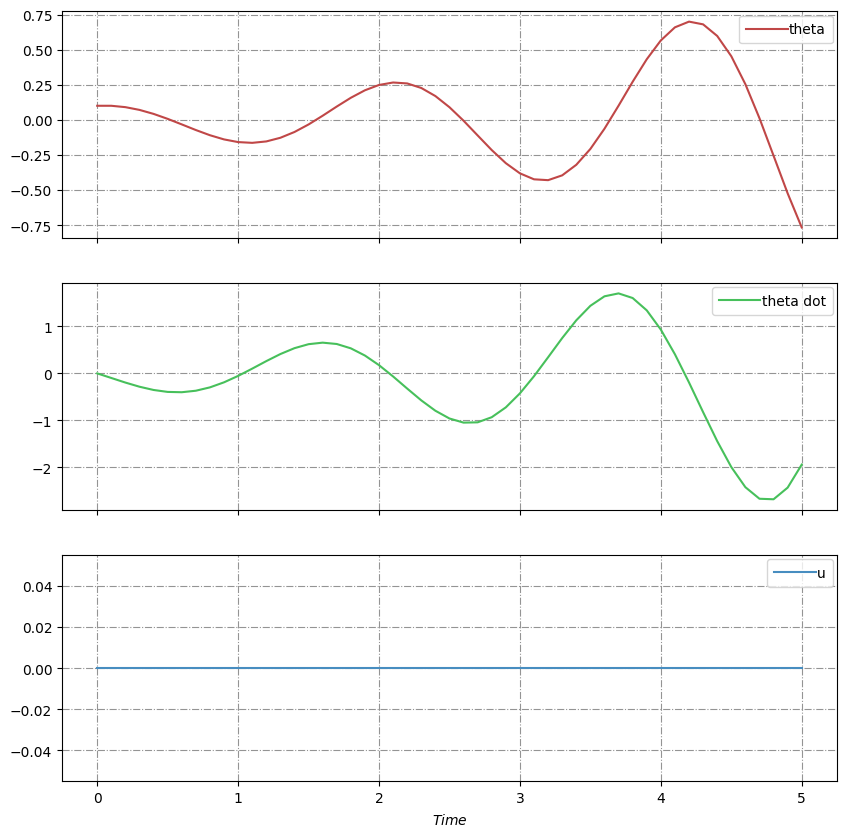

In [8]:
plot_results(x, u, t)

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> ¿Qué sucede si disminuimos el sample time?
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> ¿Que sucede si disminuimos el sample time $t_s = 0.01 [s]$?
</div>

In [9]:
# Time definition
ts = 0.01
tf = 5
# System States
x0 = np.array([0.1, 0])
# Simulation of the system
x, u, t = simulation(ts, tf, x0, forward_euler)

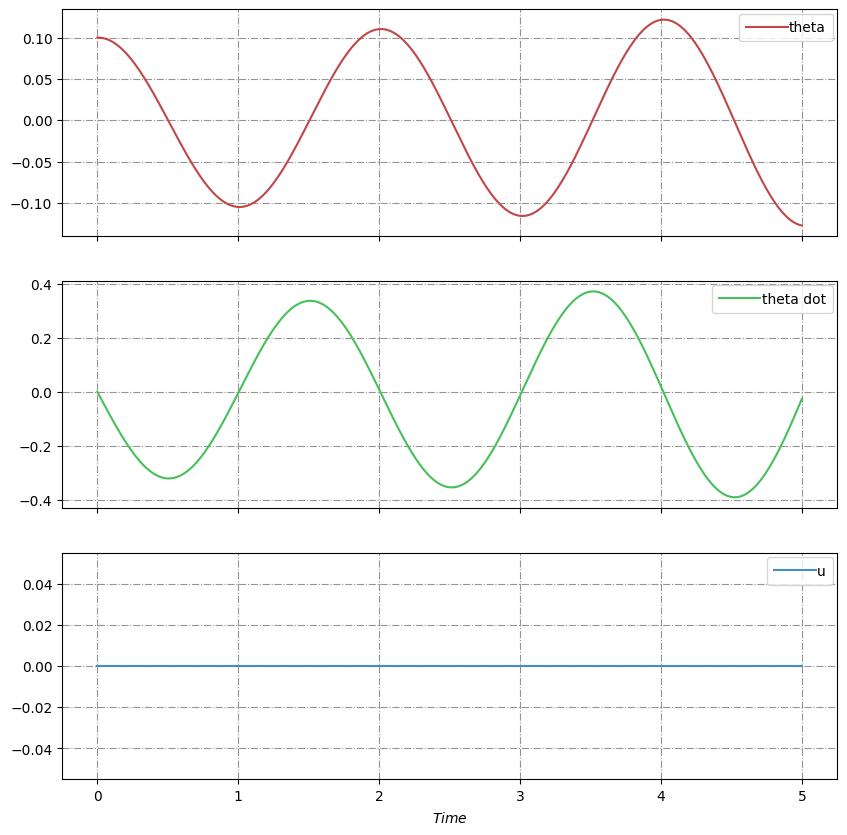

In [10]:
plot_results(x, u, t)

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> ¿Qué sucede si aumentamos el tiempo de simulación $t_f = 50~[s]$?
</div>

In [11]:
# Time definition
ts = 0.01
tf = 50
# System States
x0 = np.array([0.1, 0])
# Simulation of the system
x, u, t = simulation(ts, tf, x0, forward_euler)

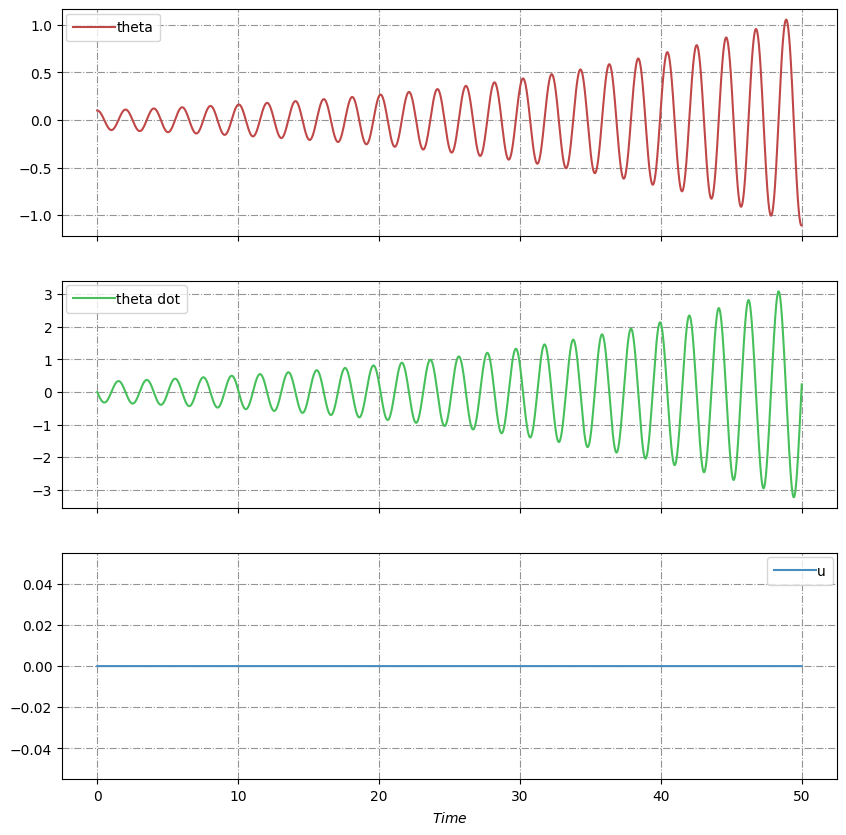

In [12]:
plot_results(x, u, t)

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> ¿Algo adicional de la acumulación del error de aproximación a través del tiempo?
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> ¿Qué pasa con la energía del sistema?
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Nuestra aproximación de la dinámica en tiempo discreto está inyectando energía al sistema debido a la aproximación.
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> No importa qué tan pequeño sea el $t_s$ de la discretización, siempre se rompe la simulación.
</div>

<h3 align="left" style="font-size: 20px;"><font color="#667388"><strong>Estabilidad de sistemas discretos.</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">No importa qué tipo de comportamiento tenga nuestro sistema en tiempo continuo, cuando discretizamos, cosas extrañas pueden llegar a pasar.</div>


<div style="text-align: justify; font-size: 20px;">La discretización puede introducir errores sistemáticos dentro de la simulación del sistema dinámico.</div>

<div style="text-align: justify; font-size: 20px;">Recordemos que el criterio de estabilidad local para un sistema en tiempo continuo está definido por:</div>


<span style="font-size:1.4em;">
\begin{equation}
\text{R}[\text{eig}(\frac{\partial \mathbf{f}}{\partial \mathbf{x}})] < 0 \Rightarrow \text{Stable}
    \end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Sin embargo, ¿qué es lo que está pasando con nuestro sistema en tiempo discreto?</div>


<div style="text-align: justify; font-size: 20px;">Las dinámicas en tiempo discreto son un mapeo iterativo o una composición de funciones, lo cual puede expresarse como:</div>


<span style="font-size:1.4em;">
\begin{equation}
    {\mathbf{x}_{k+1}} = \mathbf{f}_d(\mathbf{f}_d(\mathbf{f}_d(...\mathbf{f}_d(\mathbf{x}_{k}, \mathbf{u}_{k}))))
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Pensemos en cómo podemos linearizar esta representación. Aplicando la regla de la cadena ("Chain Rule"), podemos obtener que es básicamente la multiplicación consecutiva de jacobianas. Lo cual puede ser escrito como:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \frac{\partial \mathbf{x}_N}{\partial \mathbf{x}_0} =   \mathbf{A}^{N}_d 
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Para un análisis, asumamos que el punto de equilibrio está dado por $\mathbf{x} = \begin{bmatrix} 0 & 0 \end{bmatrix}^T$; por lo tanto, para que el sistema pueda definirse:</div>


<div style="text-align: justify; font-size: 20px;">Si pensamos en lo que significa ser estable en este punto, si realizamos una pequeña perturbación en el sistema y ejecutamos la simulación hacia el infinito (número de pasos dados), el sistema debería converger de nuevo hacia el punto de equilibrio. Esto puede ser escrito como:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \lim_{k\to\infty}   \mathbf{A}^{k}_d \mathbf{x}_0 = \mathbf{0}  ~~\forall \mathbf{x} \in \mathbb{R}^{n}
\end{equation}
</span>

<span style="font-size:1.4em;">
\begin{equation}
|\text{eig}(\mathbf{A}_d)|< 1 \Rightarrow \text{Inside Unit Circle}
    \end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Aplicando este concepto en la integración de "Forward Euler", en el caso específico del péndulo tenemos:</div>

<span style="font-size:1.4em;">
\begin{equation}
    {\mathbf{x}_{k+1}} = \overbrace{{\mathbf{x}_{k}} + t_s \mathbf{f}(\mathbf{x}_{k})}^{\mathbf{f}_d(\mathbf{x}_{k})}
\end{equation}
</span>

<span style="font-size:1.4em;">
\begin{equation}
\frac{\partial \mathbf{f}_d}{\partial \mathbf{x}} = \mathbf{I} + h \begin{bmatrix} 0 & 1 \\ -\frac{g}{l}\cos{(\mathbf{q})} & 0 \end{bmatrix}\end{equation} 
</span>

<div style="text-align: justify; font-size: 20px;">Calculando los autovalores tenemos:</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Code
</div>

### Crear variables

In [13]:
g = 9.8
l = 1
ts = 0.1
theta = 0.0

# Linear System
A = np.array([[0, 1.0], [-(g/l)*np.cos(theta), 0]], dtype = np.double)
print(A)
I = np.identity(2)
A_d = I +  ts* A
 
print(A_d)

[[ 0.   1. ]
 [-9.8  0. ]]
[[ 1.    0.1 ]
 [-0.98  1.  ]]


### Calcular eigen values y eigen vectors

In [14]:
eigenvalues, eigenvectors = LA.eig(A_d)

In [15]:
print(eigenvalues)

[1.+0.31304952j 1.-0.31304952j]


<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> ¿Qué podemos definir del sistema en tiempo discreto?
</div>


<div style="text-align: justify; font-size: 20px;">El sistema es esencialmente inestable.</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Code
</div>

In [16]:
def A_dis(x: np.ndarray, ts: float)-> np.ndarray:
    # Function which computes the forward euler integration method.
    # INPUT
    # x                                          - states of the system x_k
    # ts                                         - sample time
    # OUTPUT
    # A_d                                        - A discrete matrix of a linear system       
    
    # System variables 
    l = 1.0
    g = 9.81
    m = 1

    # Split states of the system
    theta = x[0]
    theta_dot = x[1]
    
    # reshape States and control actions
    A_d = np.array([[1, 1*ts],[-(g/l)*np.cos(theta)*ts, 1]], dtype = np.double)
    return A_d
    

In [17]:
def plot_eigen(x, t):
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))

    # Plot x_estimate with label 'x_estimate'
    state_1, = ax1.plot(t, x[0, 0:t.shape[0]], color='#C04747', lw=1.5, ls="-")
    # Add a legend
    ax1.legend([state_1],
                [r'Eigen'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
    
    ax1.grid(color='#949494', linestyle='-.', linewidth=0.8)
    ax1.set_xlabel(r"$Time}[s]$", labelpad=5)
    # Show the plot
    plt.show()

### Verificar la funcion

In [18]:
# Time definition
ts = 0.1
tf = 5

# System States
x0 = np.array([0.0, 0.0])

# Ceck eigvalues and vector
A_d = A_dis(x0, ts)

# PLot Results
eigenvalues, eigenvectors = LA.eig(A_d) 
print(eigenvalues)


[1.+0.3132092j 1.-0.3132092j]


<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Verificar con diferentes $t_s$
</div>

In [19]:
eigen_norm = np.zeros((1, 100), dtype = np.double)
ts_vector = np.linspace(0, 0.1, num=100)

In [20]:
for k in range(0, eigen_norm.shape[1]):
    A_d = A_dis(x0, ts_vector[k])
    eigenvalues, eigenvectors = LA.eig(A_d)
    eigen_norm[0, k] = np.max(np.abs(eigenvalues))

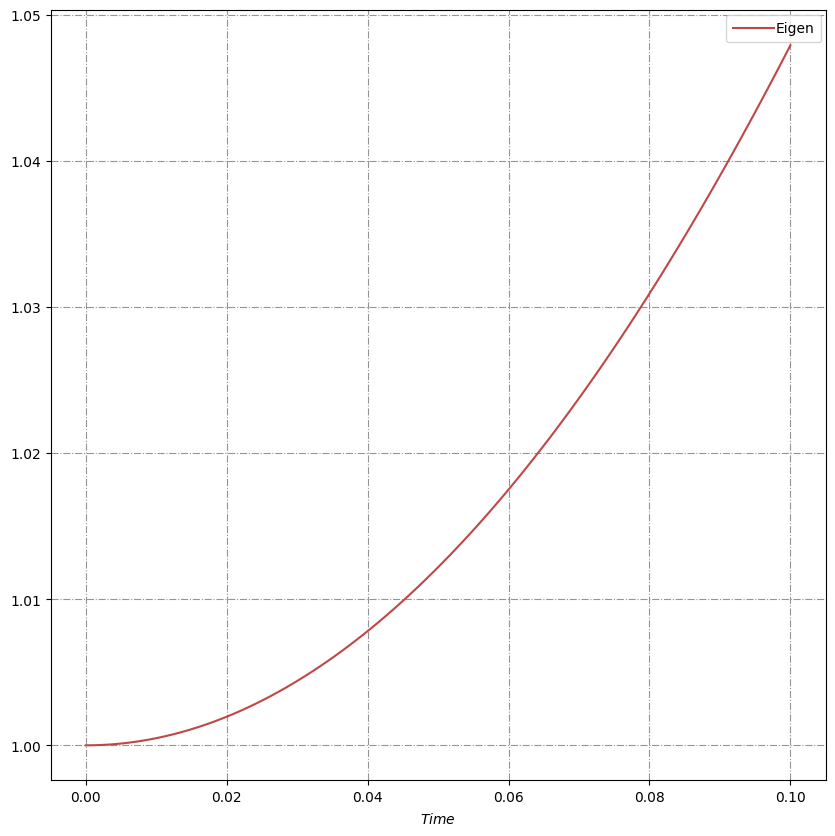

In [21]:
plot_eigen(eigen_norm, ts_vector)

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> El sistema es marginalmente estable cuando $h\to 0$
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Con esto podemos verificar que no importa qué tiempo de muestreo se utilice, siempre y cuando usemos el método de "Forward Euler", no hay forma de no romper la simulación.
</div>

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Por lo tanto, la conclusión es que no se debe utilizar "Forward Euler" para la discretización de dinámicas y simulaciones.
</div>

<div style="text-align: justify; font-size: 20px;">Por lo tanto, para obtener simulaciones de calidad en general, debemos tener en cuenta lo siguiente:</div>


<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Seleccionar un metodo apropiado de discretizacion.
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Verificar la energía del sistema, la cual debe conservarse o disiparse según las características del sistema.
</div>

<h3 align="left" style="font-size: 20px;"><font color="#667388"><strong>4th order runge kutta.</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">Este método puede considerarse como un método explícito de discretización y es esencialmente un estándar que nos permite obtener una mayor precisión en el simulador. Su formulación puede expresarse de la siguiente manera:</div>


<span style="font-size:1.4em;">
\begin{equation}
    {\mathbf{x}_{k+1}} = \mathbf{f}_{RK4}(\mathbf{x}_{k})
    \end{equation}
</span>

<span style="font-size:1.4em;">
$$
\mathbf{k}_1 = \mathbf{f}(\mathbf{x}_k),~~~~~~~~\mathbf{k}_2 = \mathbf{f}(\mathbf{x}_k + \frac{1}{2} t_s \mathbf{k}_1),~~~~~~~~\mathbf{k}_3 = \mathbf{f}(\mathbf{x}_k + \frac{1}{2} t_s \mathbf{k}_2),~~~~~~~~\mathbf{k}_4 = \mathbf{f}(\mathbf{x}_k +  t_s \mathbf{k}_3)
$$
</span>

<span style="font-size:1.4em;">
$$
\mathbf{x}_{k+1} = \overbrace{\mathbf{x}_{k} + \frac{1}{6} ts (\mathbf{k}_1 + 2\mathbf{k}_2 + 2 \mathbf{k}_3 + \mathbf{k}_4)}^{\mathbf{f}_{RK4}(\mathbf{x}_{k})}
$$
</span>

<div style="text-align: justify; font-size: 20px;">Aplicar esta formulacion al caso del pendulo. </div>


<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Code
</div>

### Definit funciones

In [22]:
def f_rk4(x: np.ndarray, u: np.ndarray, ts: float)-> np.ndarray:
    # Function which computes the runge kutta integration method.
    # INPUT
    # x                                          - states of the system x_k
    # u                                          - control actions of the system u_k
    # ts                                         - sample time
    # OUTPUT
    # x                                          - states of the system x_{k+1}

    # reshape States and control actions
    x = x.reshape((2, 1))
    u = u[0]

    k1 = dynamics(x, u)
    k2 = dynamics(x + (1/2)*ts*k1, u)
    k3 = dynamics(x + (1/2)*ts*k2, u)
    k4 = dynamics(x + ts*k3, u)

    # Compute forward Euler method
    x = x + (1/6)*ts*(k1 + 2*k2 + 2*k3 + k4)
    x = x[:, 0]
    return x

### Simulacion del sistema

In [23]:
# Time definition
ts = 0.1
tf = 50
# System States
x0 = np.array([0.1, 0])
# Simulation of the system
x, u, t = simulation(ts, tf, x0, f_rk4)

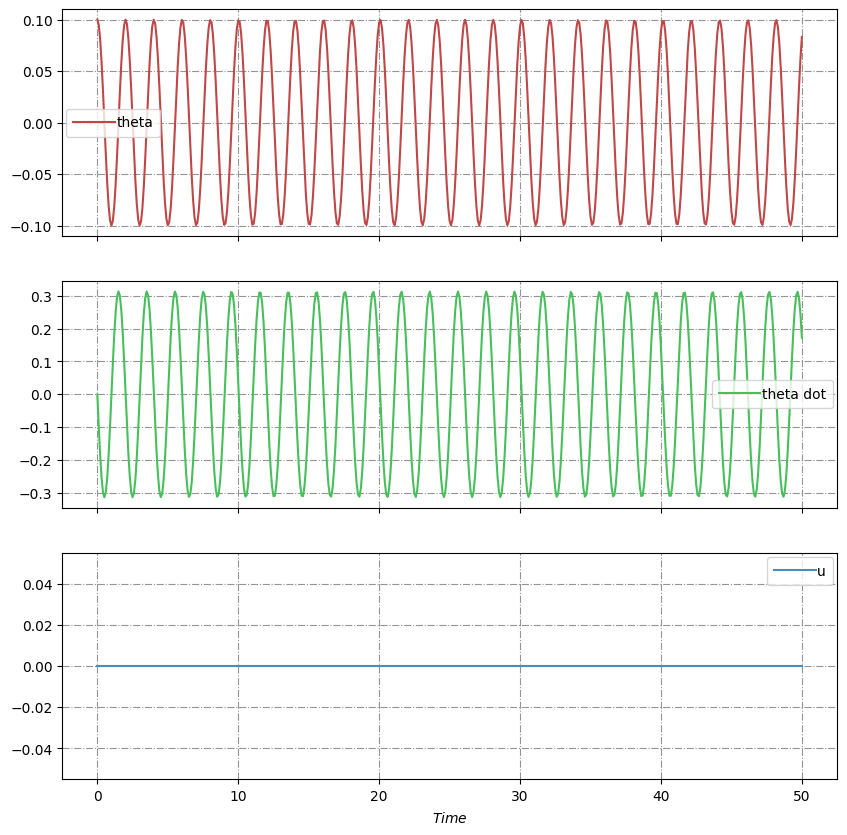

In [24]:
plot_results(x, u, t)

<div style="text-align: justify; font-size: 20px;"> Sin embargo, si se desea analizar la estabilidad del sistema, encontrar la derivada parcial del método de Runge-Kutta no es algo sencillo. Por lo cual, utilizaremos Casadi para poder realizar dichas operaciones.</div>


<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> En otra sección, se analizará con más detalle Casadi.
</div>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> Code
</div>

In [25]:
def dynamics_casadi():
    # Function representing the system dynamics using casadi
    # INPUT
    # None
    # OUTPUT
    # casadi_kutta                                       - Function to compute 4 order runge kutta.
    # df_fx                                              - partial derivative
    # df_du                                              - partial derivative
    # System symboly variables
    theta = ca.MX.sym('theta')
    theta_dot = ca.MX.sym('theta_dot')
    x = vertcat(theta, theta_dot)
    u = ca.MX.sym('u')
    ts = ca.MX.sym('ts')
    # System variables 
    l = 1.0
    g = 9.81
    m = 1

    # Dynamics of the system
    theta_ddot = -(g/l)*ca.sin(theta) + (1/(m*(l**2)))*u

    # Get Vector Field
    x_dot = ca.MX.zeros(2, 1)
    x_dot[0, 0] = theta_dot
    x_dot[1, 0] = theta_ddot
    dynamics_casadi_f = Function('dynamics_casadi_f',[x, u], [x_dot])

    ## Integration method
    k1 = dynamics_casadi_f(x, u)
    k2 = dynamics_casadi_f(x + (1/2)*ts*k1, u)
    k3 = dynamics_casadi_f(x + (1/2)*ts*k2, u)
    k4 = dynamics_casadi_f(x + ts*k3, u)

    # Compute forward Euler method
    xk = x + (1/6)*ts*(k1 + 2*k2 + 2*k3 + k4)
    #xk = x + ts*k1
    casadi_kutta = Function('casadi_kutta',[x, u, ts], [xk])

    ## Calculate jacobian and gradient
    dfdx_f = jacobian(xk, x) 
    dfdu_f = jacobian(xk, u)

    df_dx = Function('df_dx', [x, u, ts], [dfdx_f])
    df_du = Function('df_du', [x, u, ts], [dfdu_f])
    
    return casadi_kutta, df_dx, df_du
        

In [26]:
def simulation_casasi(ts: float, tf: float, x0: np.ndarray, f):
    # Function which computes the simulation of the pendulum.
    # INPUT
    # x0                                          - initial state of the system
    # ts                                          - sample time
    # tf                                          - final time simulation
    # OUTPUT
    # x                                          - vector of the states of the system
    # u                                          - vector of the control actions of the system
    # t                                          - vector of the simulation time

    # Vector of the time
    t = np.arange(0, tf + ts, ts, dtype=np.double)
    
    # System States
    x = np.zeros((2, t.shape[0]+1), dtype = np.double)
    x[:, 0] = x0
    
    # System control actions
    u = np.zeros((1, t.shape[0]), dtype = np.double)
    
    # Simulation 
    for k in range(0, t.shape[0]):
        aux_states = f(x[:, k],  u[:, k], ts)
        x[:, k+1] = np.array(aux_states[:, 0]).reshape((2, ))

    return x, u, t

In [27]:
# Time definition
ts = 0.01
tf = 50
# System States
x0 = np.array([0.1, 0])

# 4 order kutta casadi
casadi_kutta, df_dx, df_du= dynamics_casadi()
# Simulation of the system
x, u, t = simulation_casasi(ts, tf, x0, casadi_kutta)

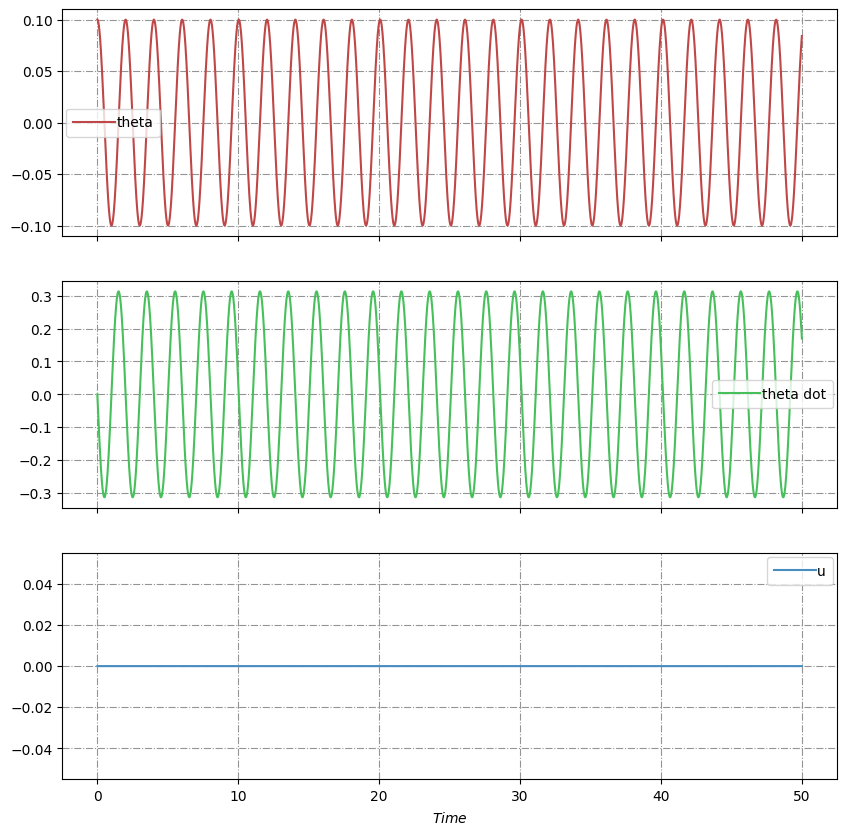

In [28]:
plot_results(x, u, t)

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b>  Derivadas parciales usando Casadi?
</div>

In [29]:
# Time definition
ts = 0.1
# System States
x0 = np.array([0.0, 0])

# 4 order kutta casadi
casadi_kutta, df_dx, df_du= dynamics_casadi()
# Check Flow of the system
x = casadi_kutta(x0, 0, ts)
print(x)

[0, 0]


In [30]:
Ad = df_dx(x0, 0, ts)
print(Ad)
Bd = df_du(x0, 0, ts)
print(Bd)


[[0.951351, 0.098365], 
 [-0.964961, 0.951351]]
[0.00495912, 0.098365]


<div style="text-align: justify; font-size: 20px;">Calcular los auto valores</div>


In [31]:
# Time definition
ts = 0.1
tf = 5

# System States
x0 = np.array([0.0, 0.0])

# Ceck eigvalues and vector
Ad = df_dx(x0, 0, ts)

# PLot Results
eigenvalues, eigenvectors = LA.eig(Ad) 
print(eigenvalues)

[0.95135098+0.30808822j 0.95135098-0.30808822j]


<div style="text-align: justify; font-size: 20px;">Calcular los autovalores con diferentes $t_s$</div>


In [32]:
eigen_norm = np.zeros((1, 100), dtype = np.double)
ts_vector = np.linspace(0, 1, num=100)

In [33]:
for k in range(0, eigen_norm.shape[1]):
    Ad = df_dx(x0, 0, ts_vector[k])
    eigenvalues, eigenvectors = LA.eig(Ad)
    eigen_norm[0, k] = np.max(np.abs(eigenvalues))

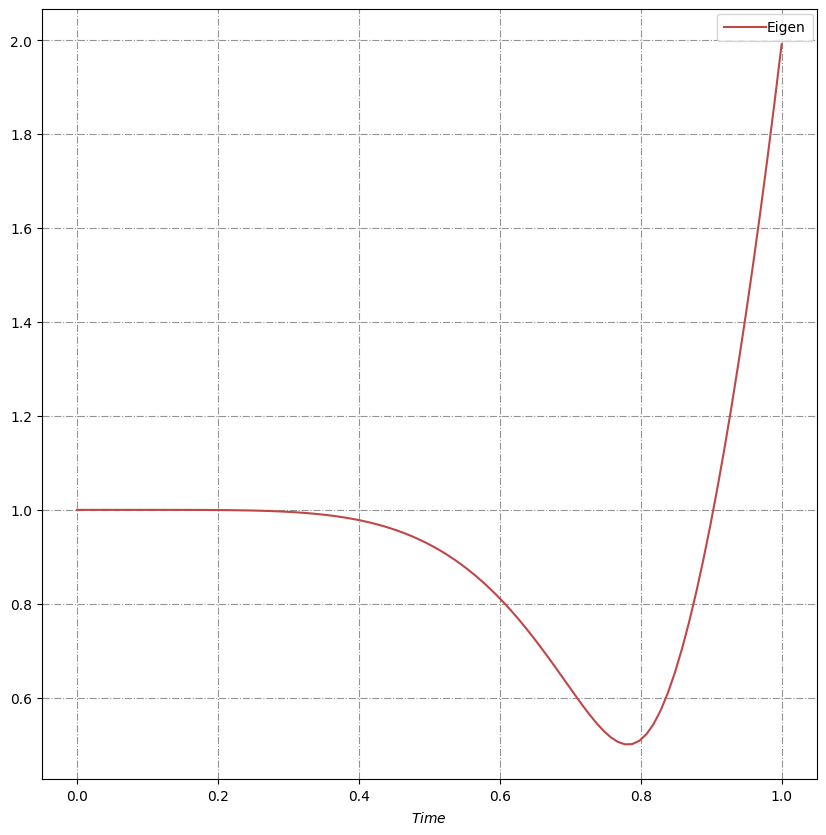

In [36]:
plot_eigen(eigen_norm, ts_vector)

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> La precisión de la discretización basada en "Runge-Kutta" supera por mucho al método de "Forward Euler".
</div>

<h3 align="left" style="font-size: px;"><font color="#2D5AC1"><strong>Discretización implicita:</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">Los métodos de discretización implícita tienen la siguiente formulación en general:</div>


<span style="font-size:1.4em;">
\begin{equation}
     \mathbf{f}_d({\mathbf{x}_{k+1}}, \mathbf{x}_{k}, \mathbf{u}_{k}) = \mathbf{0}
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Una de las versiones más simples de este método es el método de Euler implícito, el cual luce muy similar al método de Euler previamente revisado. Este método se presenta a continuación:</div>


<span style="font-size:1.4em;">
\begin{equation}
     {\mathbf{x}_{k+1}} = \mathbf{x}_k + t_s\mathbf{f}( \mathbf{x}_{k+1}, \mathbf{u}_{k})
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;"> A pesar de no ser una formulación fácil de interpretar debido a que la función vectorial es evaluada en $\mathbf{x}_{k+1}$, es posible encontrar su solución a través de "root finding algorithms". Esta formulacion puede ser escrita de la siguiente forma</div>


<span style="font-size:1.4em;">
\begin{equation}
     \mathbf{f}_d({\mathbf{x}_{k+1}}, \mathbf{x}_{k}, \mathbf{u}_{k}) =  \mathbf{x}_k + t_s \mathbf{f}( \mathbf{x}_{k+1}, \mathbf{u}_{k}) -{\mathbf{x}_{k+1}}=\mathbf{0}
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Por lo tanto, debemos resolver el problema de "root finding" para $\mathbf{x}_{k+1}$.</div>


<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> La resolucion de este problema se la hara en la seccion de optimizacion.
</div>

<h3 align="left" style="font-size: 20px;"><font color="#667388"><strong>Discretización de las acciones de control.</strong></font></h3>


<h3 align="left" style="font-size: px;"><font color="#2D5AC1"><strong>Zero Order Hold.</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">Las acciones de control se pueden llegar a discretizar, donde una de las formas más simples se conoce como "zero order hold", el cual puede expresarse como: </div>



<span style="font-size:1.4em;">
\begin{equation}
    \mathbf{u}(t) = \mathbf{u}_n~, t_n \leq t \leq t_{n+1}
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">A continuacion se representa este forma de discretizacion </div>



In [5]:
# Path to your image file
image_path = 'zero_hold_order.png'

# Specify the width for the image (adjust the value as needed)
image_width = 400

# HTML code for centering the image
html_code = f'<div style="text-align:center;"><img src="{image_path}" width="{image_width}"></div>'

# Display the HTML code
display(HTML(html_code))

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Nota:</b> En casi todas las implementaciones de hardware, lo que básicamente sucede a nivel bajo es que es muy fácil de implementar.
</div>


<h3 align="left" style="font-size: px;"><font color="#2D5AC1"><strong>First Order Hold.</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">En este método de discretización, lo que básicamente se tiene es una interpolación lineal, a diferencia de mantener un valor constante en un intervalo de tiempo.</div>


<span style="font-size:1.4em;">
\begin{equation}
    \mathbf{u}(t) = \mathbf{u}_n + \frac{\mathbf{u}_{n+1} - \mathbf{u}_{n}}{n} (t- t_n)
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">A continuacion se representa este forma de discretizacion </div>



In [11]:
# Path to your image file
image_path = 'first_order.png'

# Specify the width for the image (adjust the value as needed)
image_width = 400

# HTML code for centering the image
html_code = f'<div style="text-align:center;"><img src="{image_path}" width="{image_width}"></div>'

# Display the HTML code
display(HTML(html_code))

<div style="text-align: justify; font-size: 20px;">Con ello, es posible aproximar una forma continua de la acción de control con solo algunas observaciones.</div>

